In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
df=pd.read_csv("Zomato data .csv")

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# conver the data type  of column rate

In [10]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
    df['rate']=df['rate'].apply(handleRate)
    print(df.head())

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Text(0.5, 0, 'type of resturant')

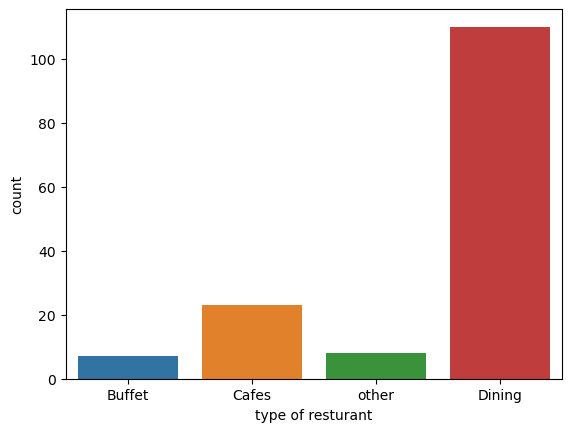

In [13]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

Text(0, 0.5, 'vote')

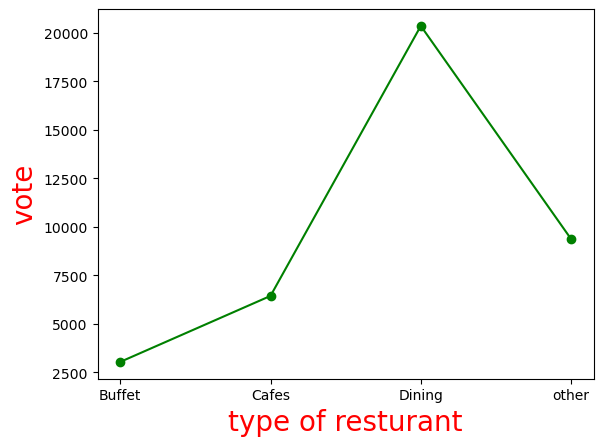

In [14]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'vote':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of resturant",c="red",size=20)
plt.ylabel("vote",c="red",size=20)

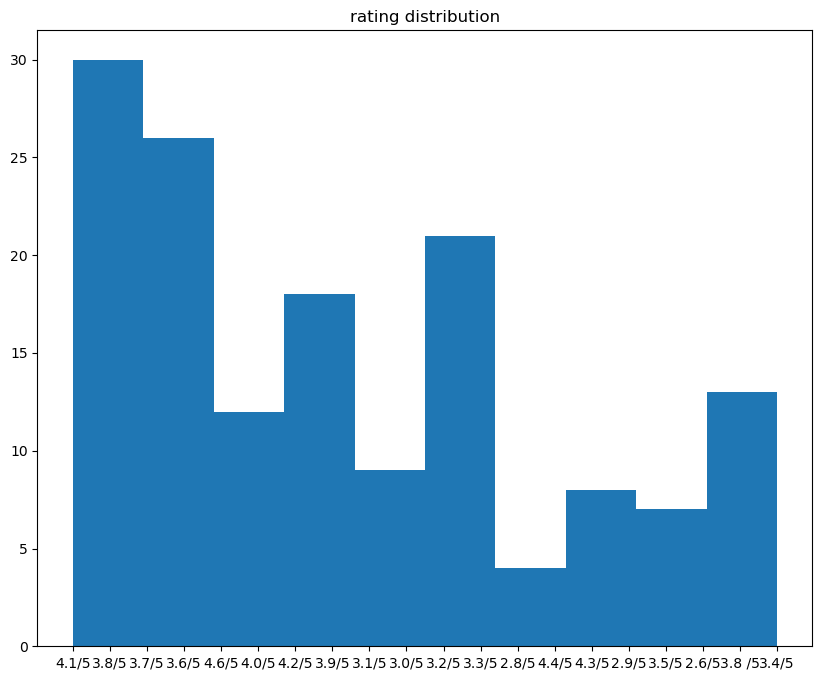

In [31]:
plt.figure(figsize=(10,8))
plt.hist(df['rate'],bins=10)
plt.title("rating distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

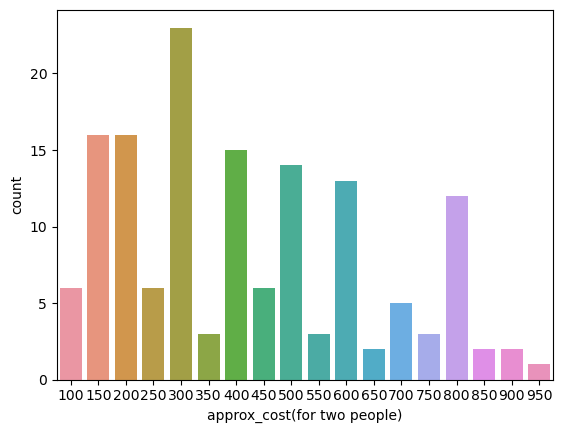

In [16]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

object
object
    rate online_order
0  4.1/5          Yes
1  4.1/5          Yes
2  3.8/5          Yes
3  3.7/5           No
4  3.8/5           No


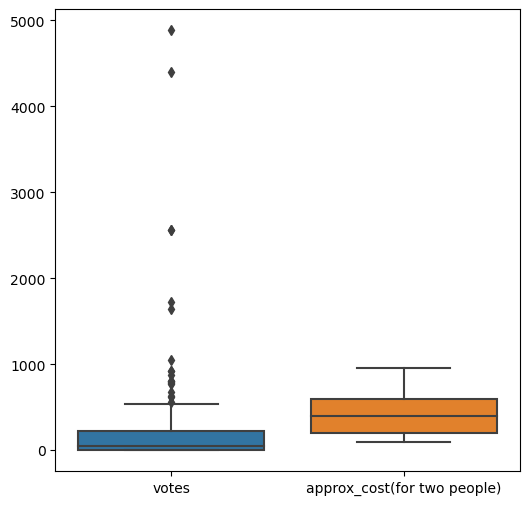

In [17]:
print(df['rate'].dtype)

print(df['online_order'].dtype)

df['online_order'] = df['online_order'].astype('category')

print(df[['rate', 'online_order']].head())

plt.figure(figsize=(6,6))
sns.boxplot(data=df)
plt.show()


C:\Users\hi\AppData\Local\Temp\ipykernel_19212\3669972506.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)


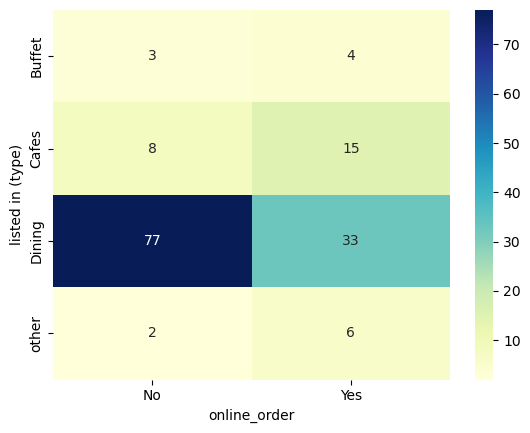

In [18]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.xlabel('online_order')
plt.ylabel('listed in (type)')
plt.show()

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


C:\Users\hi\AppData\Local\Temp\ipykernel_19212\1862867777.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)


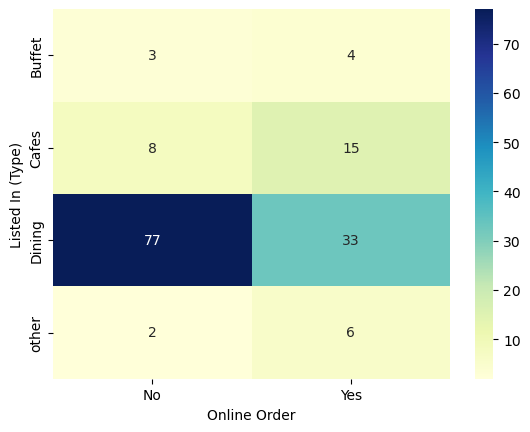

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()